In [1]:
import pandas as pd

df2_soundtracks = pd.read_csv('data/set1.csv')
df2_soundtracks['Max_emotion'] = df2_soundtracks[['Anger', 'Fear', 'Happy','Sad', 'Tender']].idxmax(axis="columns")



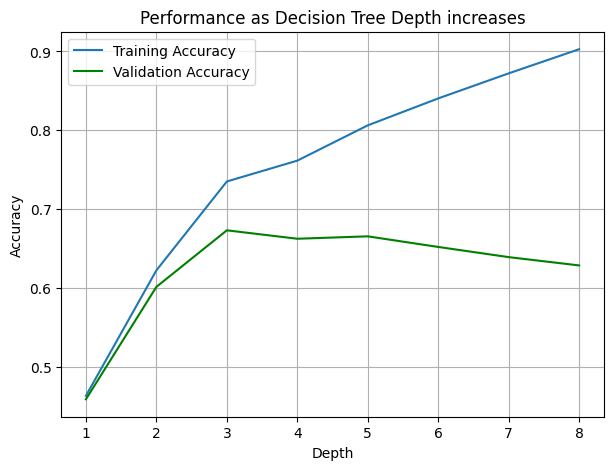

In [2]:
# DECISION TREE optimization of depth param

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Split the data into training and validation sets
X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']] 

max_depth_params = [1, 2, 3, 4, 5, 6, 7, 8]
train_scores = []
val_scores = []
# to get average scores over different folds but same data splits

for depth_index in max_depth_params:
    # Train the decision tree on the subset
    model = DecisionTreeClassifier(max_depth=depth_index, criterion='gini')        
    train = []
    test = []
    for i in range(20):
        
        skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
        for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            train.append(accuracy_score(y_train_fold, model.predict(x_train_fold)))
            test.append(accuracy_score(y_test_fold, model.predict(x_test_fold)))

    train_scores.append(np.mean(train))
    val_scores.append(np.mean(test))


# Plot the learning curve
plt.figure(figsize=(7, 5))
plt.plot(max_depth_params, train_scores, label='Training Accuracy')
plt.plot(max_depth_params, val_scores, label='Validation Accuracy', color='green')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Performance as Decision Tree Depth increases')
plt.legend()
plt.grid(True)
plt.show()

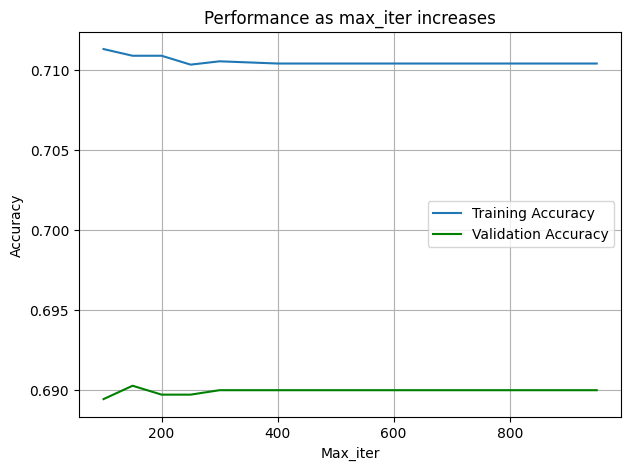

In [5]:
# LOgistic Regression optimization for max_iter    

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

# Split the data into training and validation sets
X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']] 

iter_values = list(range(100, 1000, 50))
train_scores = []
val_scores = []
# to get average scores over different folds but same data splits

for max_iter_val in iter_values:
    # Train the decision tree on the subset
    model = LogisticRegression(multi_class='multinomial', max_iter=max_iter_val)   
    train = []
    test = []
    for i in range(10):
        
        skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
        for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            train.append(accuracy_score(y_train_fold, model.predict(x_train_fold)))
            test.append(accuracy_score(y_test_fold, model.predict(x_test_fold)))

    train_scores.append(np.mean(train))
    val_scores.append(np.mean(test))

# Plot the learning curve
plt.figure(figsize=(7, 5))
plt.plot(iter_values, train_scores, label='Training Accuracy')
plt.plot(iter_values, val_scores, label='Validation Accuracy', color='green')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.title('Performance as max_iter increases')
plt.legend()
plt.grid(True)
plt.show()

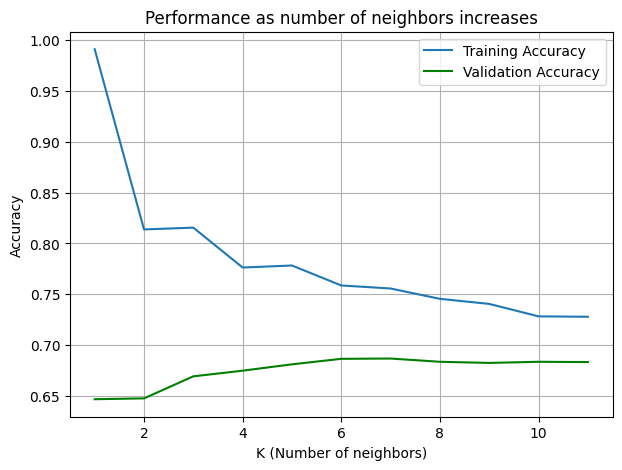

In [4]:
# KNN optimization for K value
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and validation sets
X = df2_soundtracks[['Valence', 'Energy', 'Tension']]
y = df2_soundtracks[['Max_emotion']] 

n_values = list(range(1,12))
train_scores = []
val_scores = []
# to get average scores over different folds but same data splits

for n_value in n_values:
    # Train the decision tree on the subset
    model = KNeighborsClassifier(n_neighbors=n_value)   
    train = []
    test = []
    for i in range(20):
        
        skf = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
        for train_index, test_index in skf.split(X, y):
            x_train_fold, x_test_fold = X.loc[train_index], X.loc[test_index]
            y_train_fold, y_test_fold = y.loc[train_index], y.loc[test_index]
            model.fit(x_train_fold, y_train_fold)
            train.append(accuracy_score(y_train_fold, model.predict(x_train_fold)))
            test.append(accuracy_score(y_test_fold, model.predict(x_test_fold)))

    train_scores.append(np.mean(train))
    val_scores.append(np.mean(test))

# Plot the learning curve
plt.figure(figsize=(7, 5))
plt.plot(n_values, train_scores, label='Training Accuracy')
plt.plot(n_values, val_scores, label='Validation Accuracy', color='green')
plt.xlabel('K (Number of neighbors)')
plt.ylabel('Accuracy')
plt.title('Performance as number of neighbors increases')
plt.legend()
plt.grid(True)
plt.show()